# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



## Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



## Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Answer: This data represents 17 marketing campaigns

In [1]:
# Environment: base (Python 3.13.5) opt/anaconda3/bin/python
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set_palette("tab10")

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

## Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
# Number of rows and columns
display(df.shape)
display(df.info())

(41188, 21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

None

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Problem 3: Understanding the Features

### Data Description

Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Confirm data types

In [6]:
numeric_cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
categ_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [7]:
print(f"{len(numeric_cols)} numeric covariates")
print(f"{len(categ_cols)} categorical covariates")


10 numeric covariates
10 categorical covariates


In [8]:
# data types look good for numeric covariates
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.1 MB


In [9]:
# data types look good for categorical covariates
df[categ_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB


### Apply cleaning steps

In [10]:
# Make 'pdays passed' start from 1, so that 0 indicates not previously contacted
# It will be important to consider non-linearities here
df['pdays'] = df['pdays'] + 1
df['pdays'] = df['pdays'] * (df['pdays'] != 1000)

In [11]:
# Remove rows with unusual category groups
    # marital: "unknown"
    # education: "illiterate"
    # default: "yes""
df = df[~df['default'].isin(['yes'])]
df = df[~df['marital'].isin(['unknown'])]
df = df[~df['education'].isin(['illiterate'])]

In [12]:
# Save cleaned data
df.to_csv('data/cleaned_data.csv', index=False)

### Examine numerical covariates

In [13]:
df = pd.read_csv('data/cleaned_data.csv')

In [14]:
# No obvious outliers or problematic values. Will apply standard scaling to numeric covariates
with pd.option_context('display.max_rows', None):
    pctiles = np.concatenate([np.arange(.01,.05,.01), np.arange(0.05,0.95,0.15), np.arange(.95,1,.01)])
    pctiles = np.round(pctiles, decimals=3)
    pctiles = np.unique(pctiles)
    display(df[numeric_cols].describe(percentiles=pctiles))

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41087.000000,41087.000000,41087.000000,41087.000000,41087.000000,41087.000000,41087.000000,41087.000000,41087.000000,41087.000000
mean,40.019690,258.182223,2.566603,0.257308,0.172780,0.082510,93.575996,-40.502402,3.621859,5167.048935
std,10.419191,259.208430,2.768087,1.507480,0.494836,1.570734,0.578703,4.627195,1.734308,72.260910
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
1%,23.000000,11.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-49.500000,0.659000,4963.600000
2%,24.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.379000,-47.100000,0.714000,4991.600000
3%,25.000000,23.000000,1.000000,0.000000,0.000000,-3.000000,92.431000,-47.100000,0.720000,4991.600000
4%,25.000000,29.000000,1.000000,0.000000,0.000000,-2.900000,92.469000,-47.100000,0.740440,5008.700000
5%,26.000000,36.000000,1.000000,0.000000,0.000000,-2.900000,92.713000,-47.100000,0.797000,5011.340000
20%,31.000000,89.000000,1.000000,0.000000,0.000000,-1.800000,92.893000,-46.200000,1.299000,5099.100000


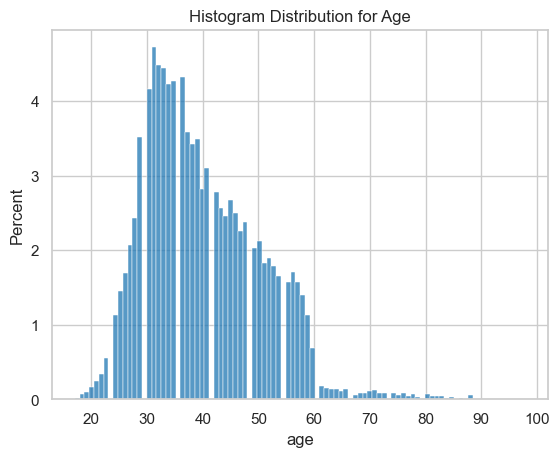

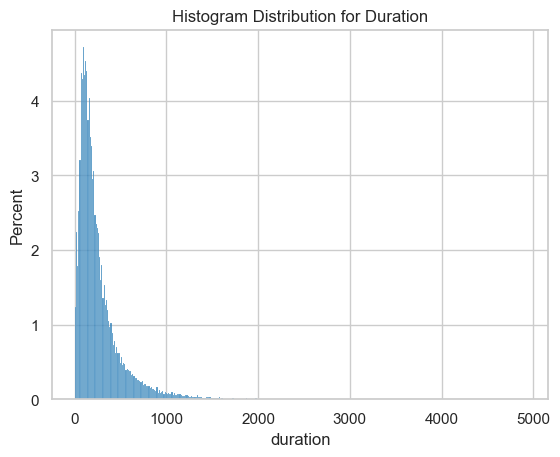

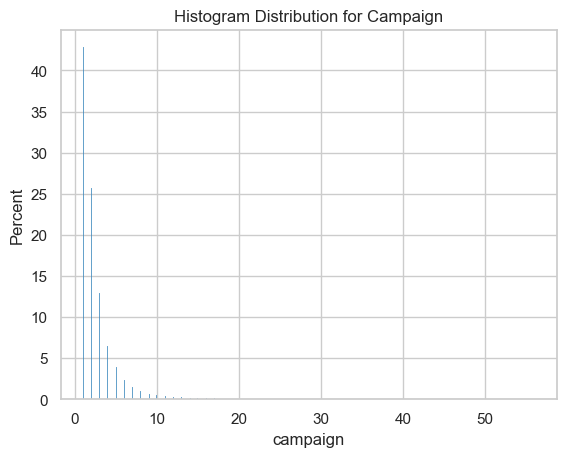

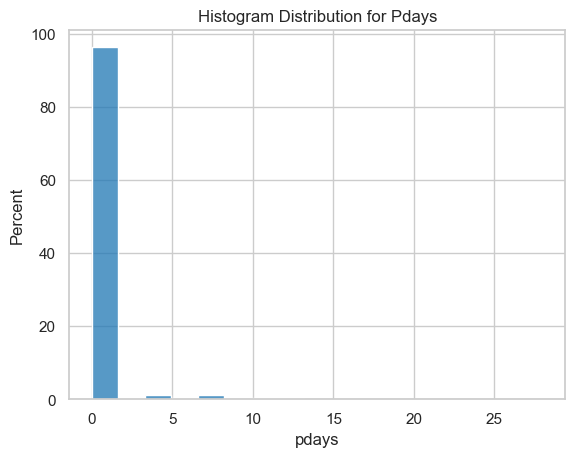

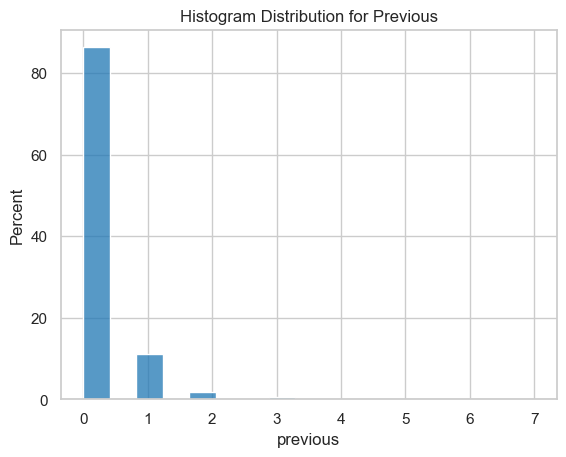

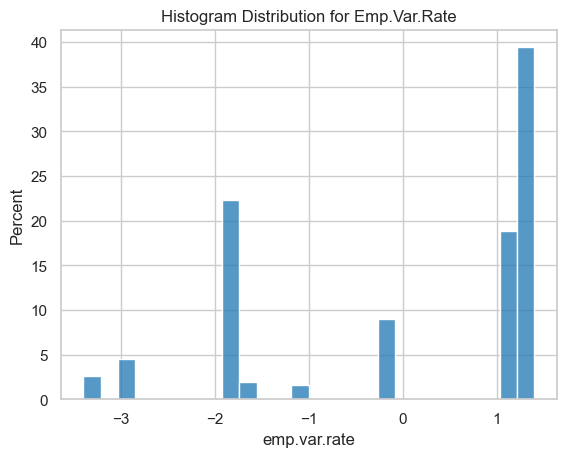

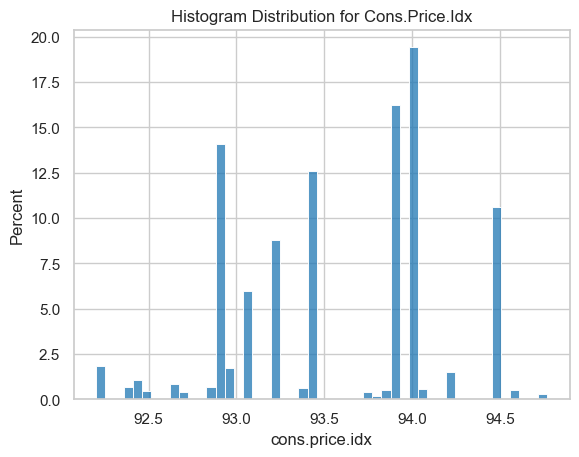

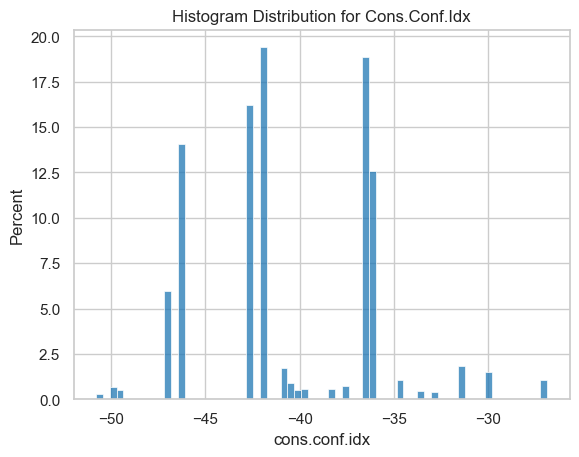

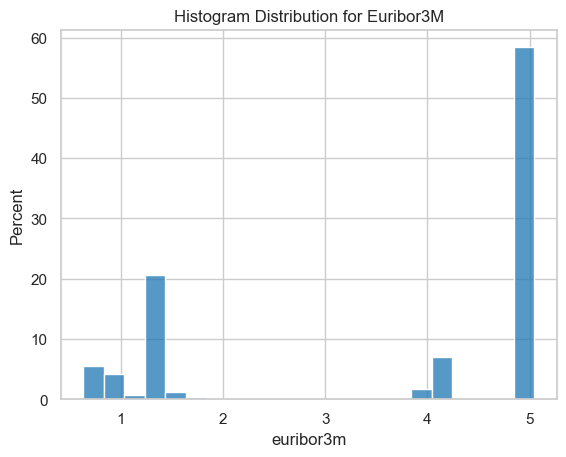

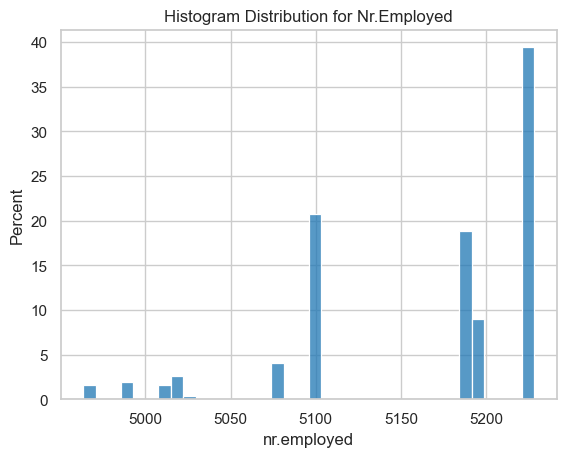

In [15]:
# Histograms for numeric columns
for col in numeric_cols:
    q1,q99 = df[col].quantile([0.01,0.99])
    sample = df[(df[col] >= q1) & (df[col] <= q99)]

    if col == 'pdays':
        sample = sample[sample['pdays'] != 0]

    plt.close('all')
    sns.histplot(data=df, x=col, stat='percent')
    plt.title(f'Histogram Distribution for {col.replace('_', ' ').title()}')
    plt.savefig(f'output/hist_{col}.png')
    plt.show()

### Examine categorical covariates

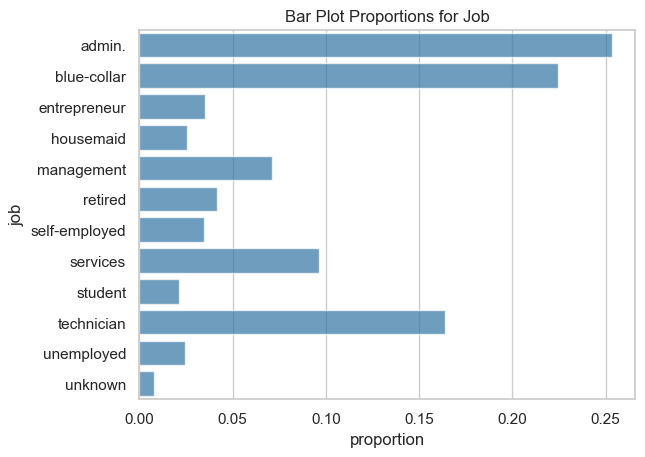

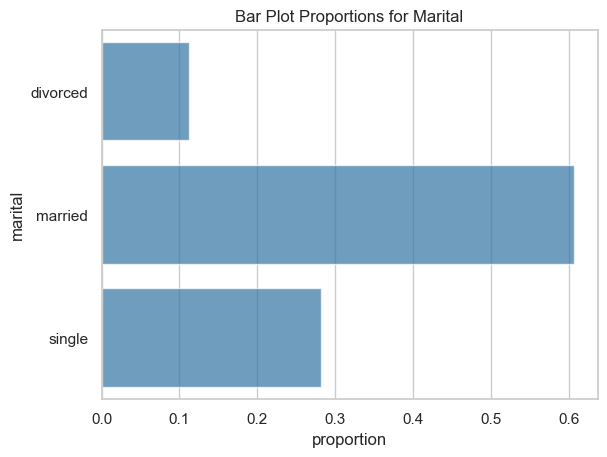

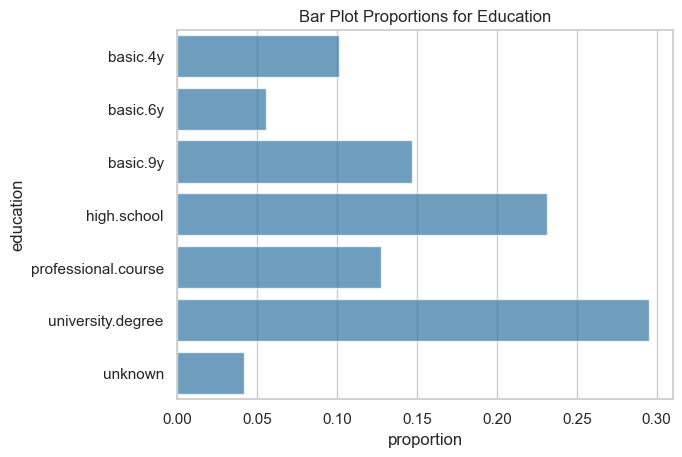

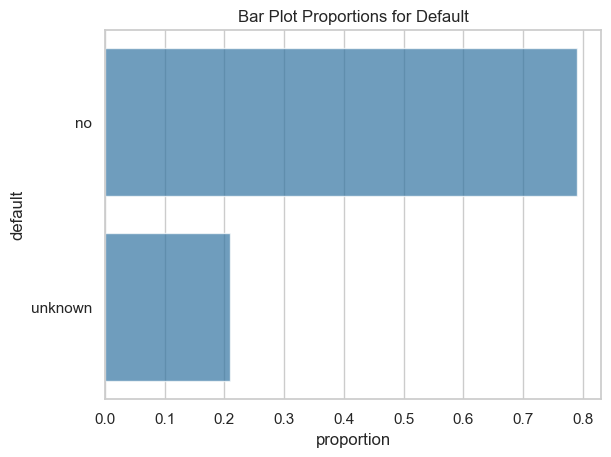

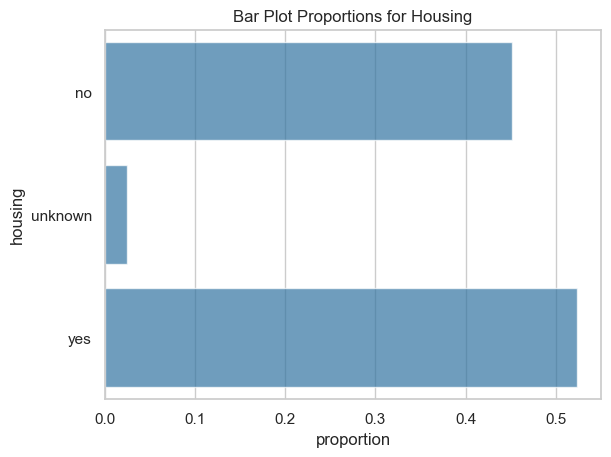

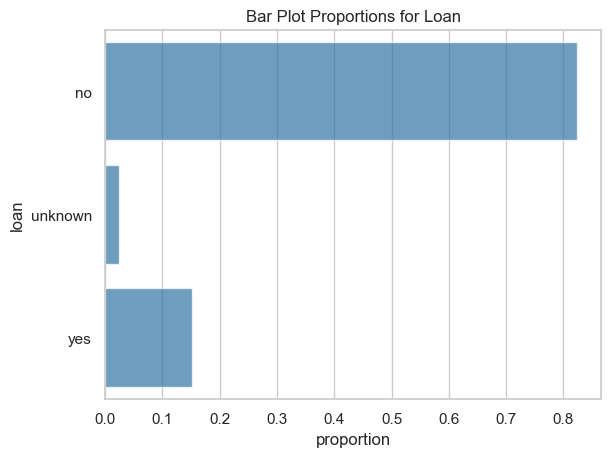

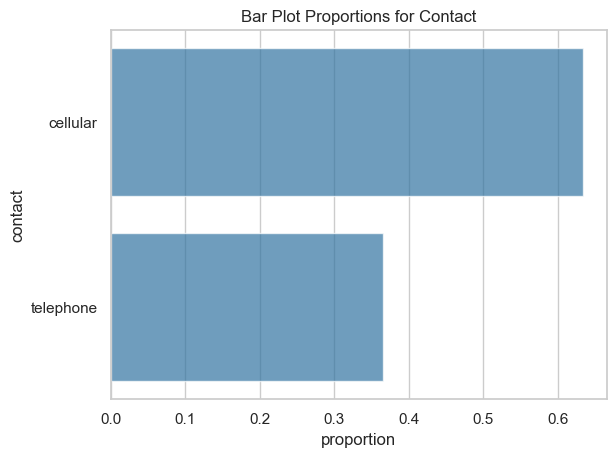

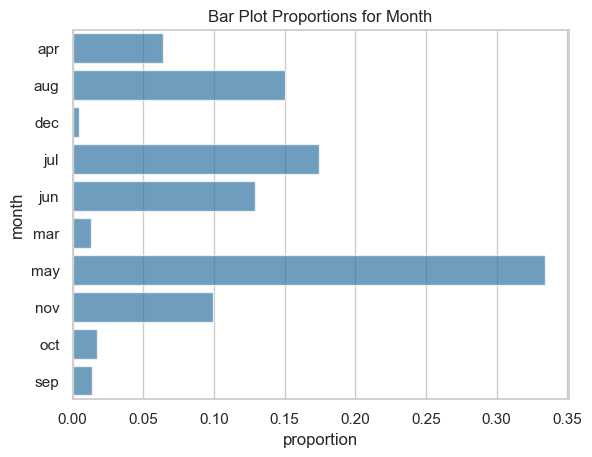

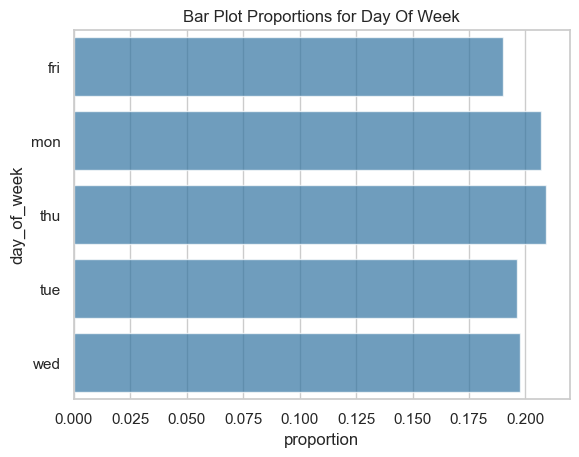

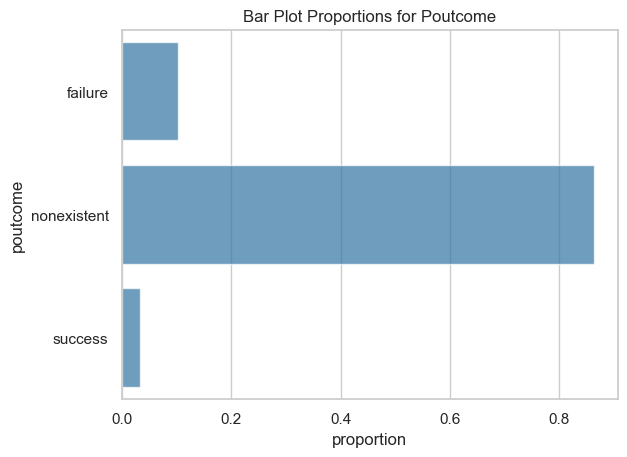

In [16]:
# Bar plots for categorical columns
# Things look good here
for col in categ_cols:
    counts = df[col].value_counts(normalize=True, dropna=False).sort_index().reset_index()
    plt.close('all')
    sns.barplot(data=counts, y=col, x='proportion', alpha=0.7)
    plt.title(f'Bar Plot Proportions for {col.replace('_', ' ').title()}')
    plt.savefig(f'output/bar_{col}.png')
    plt.show()

### Check missing values (none)

In [17]:
# Missing value percentages (none!)
df.isnull().mean() * 100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

## Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

**Answer:** 
- The business objective of this task is to build a model that predicts a successful marketing contact, defined as a contacted individual subscribing to a term deposit. The client aims to target the most promising individuals for the marketing campaign (those who are most likely to become their customers).

## Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [18]:
# Basic imports
import numpy as np
import pandas as pd
import joblib
import time

# Train/test splits and regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score


# Pre-processing pipelines
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [19]:
# Clean data from problem 2
df = pd.read_csv('data/cleaned_data.csv')

In [20]:
# Encode target as 1 if 'yes' and 0 if 'no'
df['y'] = (df['y'] == 'yes').astype(int)

In [21]:
# There is class imbalance, but it is not too severe
df['y'].value_counts(normalize=True)

y
0    0.887458
1    0.112542
Name: proportion, dtype: float64

In [22]:
# Numeric covariates: apply standard scaler (mean 0 var 1)
numeric_pipe = Pipeline([
    ('scale', StandardScaler()),
])

# Categorical Covariates: one-hot encoding
# (needs to be non-sparse to extract feature names)
categ_pipe = Pipeline([
    ('onehot',  OneHotEncoder(handle_unknown='ignore', drop=None, sparse_output=False)), 
])

# Column Transformer with above pipelines
feature_prep = ColumnTransformer(
    transformers = [
        ('numeric', numeric_pipe, numeric_cols),
        ('categ', categ_pipe, categ_cols),  
    ], 
    verbose_feature_names_out = False
)

feature_prep.set_output(transform="pandas")

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scale', StandardScaler())]),
                                 ['age', 'duration', 'campaign', 'pdays',
                                  'previous', 'emp.var.rate', 'cons.price.idx',
                                  'cons.conf.idx', 'euribor3m',
                                  'nr.employed']),
                                ('categ',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact', 'month',
                                  'day_of_week', 'poutcome'])],
                  verbose_feature_names_out=False)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [23]:
# Train / test splits
X = df[numeric_cols + categ_cols]
y = df['y'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=317)

In [24]:
display(X_train.shape)
display(X_test.shape)

(32869, 20)

(8218, 20)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [25]:
# Use random classifier as the baseline model
# This model randomly predicts a successful contact with empirical success rate $p$ in training data
# Baseline metrics are AUROC = 0.50, and precision = recall = F1-score = $p$
# Baseline accuracy = p^2 + (1-p)^2
rng = np.random.default_rng(312) # random seed
rand_unif = rng.random(y_test.shape)   
avg_y_train = y_train.mean()
baseline = (rand_unif < avg_y_train).astype(int) 


In [26]:
# Empirical success rate in training data (for random classifier)
baseline_accuracy = avg_y_train**2 + (1-avg_y_train)**2
print(f"Empirical success rate in training data: {avg_y_train:.4f}")
print(f"Baseline accuracy: {baseline_accuracy:.4f}")

Empirical success rate in training data: 0.1123
Baseline accuracy: 0.8006


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [27]:
# Pipeline with feature preparation + logistic regression
# Use class weights to account for imbalance
logistic = Pipeline([
    ('prep', feature_prep),
    ('model', LogisticRegression(max_iter=1000, random_state=813)),
])

In [28]:
logistic.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categ',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])],
                                   verbose_feature_names_out=False)),
                ('model', LogisticRegression(max_iter=1000, random_state=813))])

### Problem 9: Score the Model

What is the accuracy of your model?

Answer: 
- Logistic Accuracy = 0.8624
- Baseline Accuracy = 0.8006
- Logistic regression performs above the baseline model in terms of accuracy

In [29]:
# Accuracy for logistic regression
y_pred = logistic.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {logistic_accuracy:.4f}")
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")


Logistic Regression Accuracy: 0.9120
Baseline Accuracy: 0.8006


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [31]:
# k-nearest neighbors
knn = Pipeline([
    ('prep', feature_prep),
    ('model', KNeighborsClassifier(n_jobs = -1)),
])

# Decision Tree (use balanced class weights to make it comparable to above)
tree = Pipeline([
    ('prep', feature_prep),
    ('model', DecisionTreeClassifier()),
])

# SVM (use balanced class weights to make it comparable to above)
svm = Pipeline([
    ('prep', feature_prep),
    ('model', SVC()),
])

In [32]:
# Initialize dictionaries to store results
logistic_dict = dict(model='logistic')
knn_dict = dict(model='knn')
tree_dict = dict(model='tree')
svm_dict = dict(model='svm')

In [33]:
# Train models and keep track of fit time
t0 = time.perf_counter()
logistic.fit(X_train, y_train)
logistic_dict['elapsed'] = time.perf_counter() - t0
print(f"Logistic Regression fit time: {logistic_dict['elapsed']:.2f} seconds")

t0 = time.perf_counter()
knn.fit(X_train, y_train)
knn_dict['elapsed'] = time.perf_counter() - t0
print(f"KNN fit time: {knn_dict['elapsed']:.2f} seconds")

t0 = time.perf_counter()
tree.fit(X_train, y_train)
tree_dict['elapsed'] = time.perf_counter() - t0
print(f"Decision Tree fit time: {tree_dict['elapsed']:.2f} seconds")

t0 = time.perf_counter()
svm.fit(X_train, y_train)
svm_dict['elapsed'] = time.perf_counter() - t0
print(f"SVM fit time: {svm_dict['elapsed']:.2f} seconds")

Logistic Regression fit time: 0.50 seconds
KNN fit time: 0.07 seconds
Decision Tree fit time: 0.24 seconds
SVM fit time: 11.88 seconds


In [34]:
# Evaluate accuracy on train & test sets
train_acc = dict()
test_acc = dict()

y_pred_train = logistic.predict(X_train)
y_pred_test = logistic.predict(X_test)
logistic_dict['train_acc'] = accuracy_score(y_train, y_pred_train)
logistic_dict['test_acc'] = accuracy_score(y_test, y_pred_test)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
knn_dict['train_acc'] = accuracy_score(y_train, y_pred_train)
knn_dict['test_acc'] = accuracy_score(y_test, y_pred_test)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)
tree_dict['train_acc'] = accuracy_score(y_train, y_pred_train)
tree_dict['test_acc'] = accuracy_score(y_test, y_pred_test)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
svm_dict['train_acc'] = accuracy_score(y_train, y_pred_train)
svm_dict['test_acc'] = accuracy_score(y_test, y_pred_test)

In [35]:
# Organize results into dataframe
results = pd.DataFrame([logistic_dict, knn_dict, tree_dict, svm_dict])
results

,model,elapsed,train_acc,test_acc
0,logistic,0.504790,0.910615,0.912022
1,knn,0.068654,0.927074,0.901314
2,tree,0.242400,1.000000,0.889998
3,svm,11.876209,0.923393,0.914091


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [36]:
# Optimize on AUROC for grid search (since accuracy can be problematic for imbalanced classes)
cv_opts = dict(scoring='accuracy', cv=5, n_jobs=-1, refit=True, verbose=2)

grid_logistic = GridSearchCV(
    estimator=logistic,
    param_grid={'model__C': np.logspace(-3, 2, 10)}, # L2 penalty term
    **cv_opts
)

In [37]:
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid={
        'model__n_neighbors': np.linspace(5, 50, 10).astype(int), # number of neighbors
        'model__weights': ['uniform', 'distance'], # equal/distance based weighting
        'model__p': [1, 2], # L1/L2 distance
    },
    **cv_opts
)

In [38]:
grid_tree = GridSearchCV(
    estimator=tree,
    param_grid={
        'model__max_depth': np.linspace(2, 10, 5).astype(int), # tree depth
        'model__min_samples_leaf':  np.linspace(2, 10, 5).astype(int), # min leaf size
        'model__min_samples_split':  np.linspace(2, 10, 5).astype(int), # min split size
        'model__max_features': [None, 'sqrt', 0.5], # rules for feature subsampling
    },
    **cv_opts
)

In [ ]:
# (skip SVM - too time consuming and not worth the performance gains)

In [40]:
# Initialize dictionaries to store results
grid_logistic_dict = dict(model='logistic')
grid_knn_dict = dict(model='knn')
grid_tree_dict = dict(model='tree')

In [41]:
# Train models and keep track of fit time
t0 = time.perf_counter()
grid_logistic.fit(X_train, y_train)
grid_logistic_dict['elapsed'] = time.perf_counter() - t0
print(f"Logistic Regression fit time (Grid Search): {grid_logistic_dict['elapsed']:.2f} seconds")

t0 = time.perf_counter()
grid_knn.fit(X_train, y_train)
grid_knn_dict['elapsed'] = time.perf_counter() - t0
print(f"KNN fit time (Grid Search): {grid_knn_dict['elapsed']:.2f} seconds")

t0 = time.perf_counter()
grid_tree.fit(X_train, y_train)
grid_tree_dict['elapsed'] = time.perf_counter() - t0
print(f"Decision Tree fit time (Grid Search): {grid_tree_dict['elapsed']:.2f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................................model__C=0.001; total time=   0.2s
[CV] END .....................................model__C=0.001; total time=   0.2s
[CV] END .....................................model__C=0.001; total time=   0.2s
[CV] END .....................................model__C=0.001; total time=   0.2s
[CV] END ......................model__C=0.003593813663804626; total time=   0.2s
[CV] END ......................model__C=0.003593813663804626; total time=   0.2s
[CV] END .....................................model__C=0.001; total time=   0.2s
[CV] END ......................model__C=0.003593813663804626; total time=   0.2s
[CV] END ......................model__C=0.003593813663804626; total time=   0.2s
[CV] END ......................model__C=0.003593813663804626; total time=   0.2s
[CV] END .......................model__C=0.01291549665014884; total time=   0.2s
[CV] END .......................model__C=0.01291

In [42]:
# Evaluate accuracy on train & test sets (for best estimators)
train_acc = dict()
test_acc = dict()

y_pred_train = grid_logistic.best_estimator_.predict(X_train)
y_pred_test = grid_logistic.best_estimator_.predict(X_test)
grid_logistic_dict['train_acc'] = accuracy_score(y_train, y_pred_train)
grid_logistic_dict['test_acc'] = accuracy_score(y_test, y_pred_test)

y_pred_train = grid_knn.best_estimator_.predict(X_train)
y_pred_test = grid_knn.best_estimator_.predict(X_test)
grid_knn_dict['train_acc'] = accuracy_score(y_train, y_pred_train)
grid_knn_dict['test_acc'] = accuracy_score(y_test, y_pred_test)

y_pred_train = grid_tree.best_estimator_.predict(X_train)
y_pred_test = grid_tree.best_estimator_.predict(X_test)
grid_tree_dict['train_acc'] = accuracy_score(y_train, y_pred_train)
grid_tree_dict['test_acc'] = accuracy_score(y_test, y_pred_test)

In [ ]:
# Organize results into dataframe
# Was able to improve on logistic classifier, but not kNN or decision tree
grid_results = pd.DataFrame([grid_logistic_dict, grid_knn_dict, grid_tree_dict])
grid_results

,model,elapsed,train_acc,test_acc
0,logistic,5.176781,0.910828,0.911901
1,knn,74.187439,1.000000,0.909224
2,tree,27.921259,0.919590,0.916038


In [45]:
# Compare with previous results
results


,model,elapsed,train_acc,test_acc
0,logistic,0.504790,0.910615,0.912022
1,knn,0.068654,0.927074,0.901314
2,tree,0.242400,1.000000,0.889998
3,svm,11.876209,0.923393,0.914091
